# Linear Regression

## Dataset Marathon time Predictions

### Created in 2021
### @author: juana.mendoz4@gmail.com

### Dataset information:
    
url: https://www.kaggle.com/datasets/girardi69/marathon-time-predictions/


#### Context:

Every Marathoner has a time goal in mind, and this is the result of all the training done in months of exercises. Long runs, Strides, Kilometers and phisical exercise, all add improvement to the result. Marathon time prediction is an art, generally guided by expert physiologists that prescribe the weekly exercises and the milestones to the marathon.
Unfortunately, Runners have a lot of distractions while preparing the marathon, work, family, illnes, and therefore each one of us arrives to the marathon with his own story.
The "simple" approach is to look at data after the competition, the Leaderboard.

But what if we could link the Marathon result to the training history of the Athlete? Could we find that "non orthodox" training plans give good results?

- id:
simple counter


- Marathon:
the Marathon name where the data were extracted. I use the data coming out from Strava "Side by side comparison" and the data coming from the final marathon result


- Name:
The athlete's name, still some problems with UTF-8, I'll fix that soon


- Category:
the sex and age group of a runner

    - MAM Male Athletes under 40 years
    - WAM Women under 40 Years
    - M40 Male Athletes between 40 and 45 years


- km4week
This is the total number of kilometers run in the last 4 weeks before the marathon, marathon included. If, for example, the km4week is 100, the athlete has run 400 km in the four weeks before the marathon


- sp4week
This is the average speed of the athlete in the last 4 training weeks. The average counts all the kilometers done, included the slow kilometers done before and after the training. A typic running session can be of 2km of slow running, then 12-14km of fast running, and finally other 2km of slow running. The average of the speed is this number, and with time this is one of the numbers that has to be refined


- cross training:
If the runner is also a cyclist, or a triathlete, does it counts? Use this parameter to see if the athlete is also a cross trainer in other disciplines


- Wall21:
In decimal. The tricky field. To acknowledge a good performance, as a marathoner, I have to run the first half marathon with the same split of the second half. If, for example, I run the first half marathon in 1h30m, I must finish the marathon in 3h (for doing a good job). If I finish in 3h20m, I started too fast and I hit "the wall". My training history is, therefore, less valid, since I was not estimating my result


- Marathon time:
In decimal. This is the final result. Based on my training history, I must predict my expected Marathon time


- Category:
This is an ancillary field. It gives some direction, so feel free to use or discard it. It groups in:

    - A results under 3h
    - B results between 3h and 3h20m
    - C results between 3h20m and 3h40m
    - D results between 3h40 and 4h

## Development

### 1. Prepare data

import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Load dataset.

In [2]:
df_marathon = pd.read_csv("MarathonData.csv")
df_marathon

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D


Dataframe info.

In [3]:
df_marathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


Convert Wall21 to int.

In [4]:
df_marathon.Wall21 = pd.to_numeric(df_marathon.Wall21, errors = 'coerce')

Describe int values in the dataframe.

In [5]:
df_marathon.describe()

,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,81.000000,87.000000
mean,44.000000,62.347126,139.840706,1.630617,3.319080
std,25.258662,26.956019,1191.427864,0.210490,0.376923
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,22.500000,44.200000,11.498168,1.450000,3.045000
50%,44.000000,58.800000,12.163424,1.620000,3.320000
75%,65.500000,77.500000,12.854036,1.760000,3.605000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


Plot histogram.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'km4week'}>],
       [<AxesSubplot:title={'center':'sp4week'}>,
        <AxesSubplot:title={'center':'Wall21'}>],
       [<AxesSubplot:title={'center':'MarathonTime'}>, <AxesSubplot:>]],
      dtype=object)

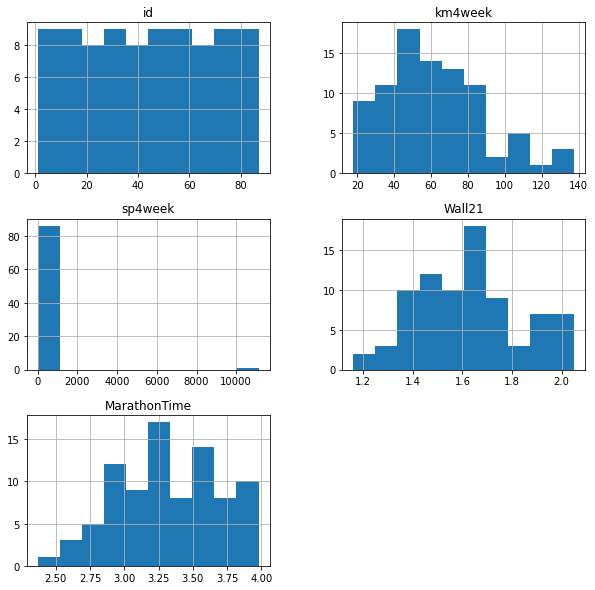

In [6]:
df_marathon.hist(figsize=(10,10))

Select the most relevant fields from the dataframe. To do this, the columns are eliminated: id, Marathon, name.

Analysis:
- id: The athlete's ID does not influence their performance.
- name: The athlete's name does not influence their performance.
- Marathon: The name of the marathon does not influence the athlete's performance.
- CATEGORY: We already have a field that determines the time of each runner, this field is not necessary.

In [7]:
df_marathon = df_marathon.drop(columns = ['Name', 'id', 'Marathon', 'CATEGORY'])
df_marathon

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,NaN,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,NaN,1.94,3.94
85,M45,33.2,11.066667,NaN,2.05,3.95


Verify null or empty data.

In [8]:
df_marathon.isna().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            6
MarathonTime      0
dtype: int64

In [9]:
df_marathon.isnull().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            6
MarathonTime      0
dtype: int64

We must check if there is null data in the data set and make the decision whether to fill in the missing data or delete the entire record.

Analysis:

- Category has 87 data in total and of these records 6 are null, therefore, omitting the 6 records has no impact.

- Wall21 has 87 data in total and of these records 6 are null, therefore, omitting the 6 records has no impact.

- CrossTraining has 87 records in total and of these 74 are null, therefore, the 74 records cannot be dispensed with because it represents a large part. Therefore, it is decided to represent this null data as 0.

In [10]:
def convert_null_to_zero(column):
    """
    Convert the dataframe register of a certain column that are null to zero.

    Parameters
    ----------
    column: String
        Dataframe column.

    Returns
    -------
    None.

    """
    try:
        null_registers = df_marathon[column].isnull().any()
        if null_registers:
            df_marathon[column] = df_marathon[column].fillna(0)
    except KeyError:
        print(f'The column {column} does not exits in the DataFrame.')
    except Exception as e:
        print(f'There is an error: {str(e)}')

CrossTraining column.

In [11]:
convert_null_to_zero('CrossTraining')
df_marathon.isnull().sum()

Category         6
km4week          0
sp4week          0
CrossTraining    0
Wall21           6
MarathonTime     0
dtype: int64

Delete duplicate registers in Category and Wall21 columns.

In [12]:
try:
    df_marathon = df_marathon.dropna(how = 'any')
except Exception as e:
    print(f'There is an error: {str(e)}')
df_marathon.isnull().sum()

Category         0
km4week          0
sp4week          0
CrossTraining    0
Wall21           0
MarathonTime     0
dtype: int64

The model requires that the data included be of numerical type, therefore, those that are not, must have a transformation. In our case there are two NON-numeric fields: Category and CrossTraining.

In [13]:
df_marathon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 86
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       81 non-null     object 
 1   km4week        81 non-null     float64
 2   sp4week        81 non-null     float64
 3   CrossTraining  81 non-null     object 
 4   Wall21         81 non-null     float64
 5   MarathonTime   81 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.4+ KB


First, you have to check how many different values have.

In [14]:
df_marathon.Category.unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', 'WAM'], dtype=object)

In [15]:
df_marathon.CrossTraining.unique()

array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 3h',
       'ciclista 5h'], dtype=object)

Then, assign a numerical value to each different category or value.

In [16]:
new_values = { 'Category':
              {
                  'MAM' : 1,
                  'M40' : 2,
                  'M45' : 3,
                  'M50' : 4,
                  'M55' : 5,
                  'WAM' : 6,
              },
            }

df_marathon.replace(new_values, inplace = True)

In [17]:
df_marathon.Category.unique()

array([1, 3, 2, 4, 5, 6])

In [18]:
new_values = { 'CrossTraining':
              {
                  'ciclista 1h' : 1,
                  'ciclista 3h' : 2,
                  'ciclista 4h' : 3,
                  'ciclista 5h' : 4,
                  'ciclista 13h': 5
              },
            }

df_marathon.replace(new_values, inplace = True)

In [19]:
df_marathon.CrossTraining.unique()

array([0, 1, 3, 5, 2, 4])

### 2. Train data

In mathematical terms:

The equation of the straight line is used to approximate the data.

```math
y = mx + b
```
Donde:
  - y: dependent variable or variable to predict.
  - x: independent variable or predictor variable.
  - m: slope.
  - b: intersection with the y axis.

From the data, what is the dependent variable and the independent variables?

Dependent variable or variable to predict: 
- MarathonTime

Independents variable or predictor variables:

- Category
- km4week
- sp4week
- CrossTraining
- Wall21  

In [20]:
df_marathon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 86
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       81 non-null     int64  
 1   km4week        81 non-null     float64
 2   sp4week        81 non-null     float64
 3   CrossTraining  81 non-null     int64  
 4   Wall21         81 non-null     float64
 5   MarathonTime   81 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 4.4 KB


Plot correlation between variables.

In [21]:
def plot_correlation(predict, predictor):
    """
    Plot the correlation between the dependent and independent variable.
    
    Parameters
    ----------
    predict: String
        Dataframe dependent variable.
        
    predictor: String
        Dataframe independent variable.
        
    Returns
    -------
    None.

    """
    plt.scatter(x = df_marathon[predictor], y = df_marathon[predict])
    plt.title(f'{predictor} Vs {predict}')
    plt.xlabel(f'{predictor}')
    plt.ylabel(f'{predict}')
    plt.show()

MaratonTime vs sp4week

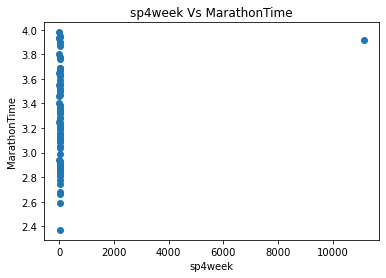

In [22]:
plot_correlation('MarathonTime', 'sp4week')

MaratonTime vs km4week

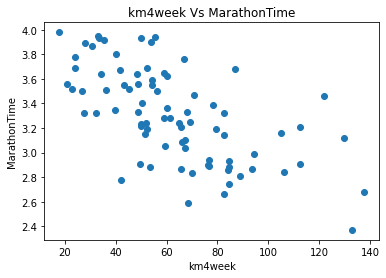

In [23]:
plot_correlation('MarathonTime', 'km4week')

MaratonTime vs Wall21

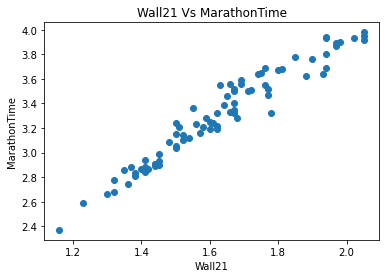

In [24]:
plot_correlation('MarathonTime', 'Wall21')

MaratonTime vs Category

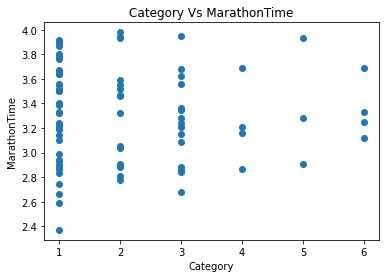

In [25]:
plot_correlation('MarathonTime', 'Category')

MaratonTime vs CrossTraining

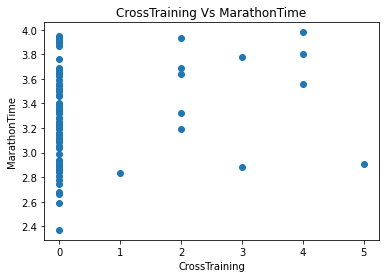

In [26]:
plot_correlation('MarathonTime', 'CrossTraining')

Split the data set into 2: training and testing.

In [27]:
df_marathon.shape

(81, 6)

An important percentage is chosen to form the training data set (it can be 70% or 80%) and the rest will be part of the validation set.

Total rows = 81
Total cols = 6

- Train data is 80%  

	81 x 80% = 64.8 -> 65


- Test data is 20%

	81 x 20% = 16.2 -> 16

In Pandas, the sample function is used to obtain a random sample of rows or columns from a DataFrame. In this case, 80% of the dataframe registers are randomly selected.

In [28]:
train_data = df_marathon.sample(frac = 0.8, random_state = 0)
train_data.shape

(65, 6)

In [29]:
train_data

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
22,2,59.4,12.638298,0,1.50,3.05
28,3,51.6,13.008403,0,1.50,3.15
65,3,60.3,11.708738,0,1.88,3.62
13,2,84.4,13.836066,0,1.41,2.88
76,1,40.3,8.337931,4,1.94,3.80
...,...,...,...,...,...,...
66,1,48.5,11.022727,2,1.93,3.64
16,5,112.3,12.594393,5,1.44,2.91
55,1,26.9,13.121951,0,1.67,3.50
20,1,94.5,11.886792,0,1.45,2.99


The remaining registers of the dataframe are taken, which are equivalent to 20%.

In [30]:
test_data = df_marathon.drop(train_data.index)
test_data.shape

(16, 6)

In [31]:
test_data

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
9,3,84.2,13.365079,0,1.35,2.86
12,3,53.5,14.078947,3,1.37,2.88
21,2,67.3,13.239344,0,1.50,3.04
26,6,129.6,12.188088,0,1.54,3.12
38,1,64.7,13.294521,0,1.50,3.24
39,6,69.2,10.053269,0,1.60,3.25
41,5,58.8,12.829091,0,1.68,3.28
46,6,48.6,12.252101,0,1.66,3.33
48,3,60.1,12.182432,0,1.55,3.36
49,1,78.2,12.000000,0,1.64,3.39


Separate the predictor variable from the predictors in each data subset (x_train, y_train, x_test, y_test).

- X Train data: rows = 65 and cols = 5
	- Category
    - km4week
    - sp4week
    - CrossTraining
    - Wall21  	


- Y Train data: rows = 65 and col = 1
    - MarathonTime
        
        
- X Test data: rows = 16 and cols = 5
    - Category
    - km4week
    - sp4week
    - CrossTraining
    - Wall21  	


- Y Test data: rows = 16 and col = 1
    - MarathonTime

The pop method on a pandas DataFrame is used to remove and return a specific column. In this example, column 'MarathonTime' is removed from the original DataFrame and stored in the variable train_label. After using pop, the DataFrame df no longer has column 'MarathonTime'. The deleted column is displayed separately.

Train data:

In [32]:
train_label = train_data.pop('MarathonTime')

So train_data is x_train:

In [33]:
train_data

,Category,km4week,sp4week,CrossTraining,Wall21
22,2,59.4,12.638298,0,1.50
28,3,51.6,13.008403,0,1.50
65,3,60.3,11.708738,0,1.88
13,2,84.4,13.836066,0,1.41
76,1,40.3,8.337931,4,1.94
...,...,...,...,...,...
66,1,48.5,11.022727,2,1.93
16,5,112.3,12.594393,5,1.44
55,1,26.9,13.121951,0,1.67
20,1,94.5,11.886792,0,1.45


And train_label is y_train:

In [34]:
train_label

22    3.05
28    3.15
65    3.62
13    2.88
76    3.80
      ... 
66    3.64
16    2.91
55    3.50
20    2.99
81    3.92
Name: MarathonTime, Length: 65, dtype: float64

The pop method on a pandas DataFrame is used to remove and return a specific column. In this example, column 'MarathonTime' is removed from the original DataFrame and stored in the variable test_label. After using pop, the DataFrame df no longer has column 'MarathonTime'. The deleted column is displayed separately.

Test data:

In [35]:
test_label = test_data.pop('MarathonTime')

So test_data is y_test:

In [36]:
test_data

,Category,km4week,sp4week,CrossTraining,Wall21
9,3,84.2,13.365079,0,1.35
12,3,53.5,14.078947,3,1.37
21,2,67.3,13.239344,0,1.50
26,6,129.6,12.188088,0,1.54
38,1,64.7,13.294521,0,1.50
39,6,69.2,10.053269,0,1.60
41,5,58.8,12.829091,0,1.68
46,6,48.6,12.252101,0,1.66
48,3,60.1,12.182432,0,1.55
49,1,78.2,12.000000,0,1.64


And test_label is y_test:

In [37]:
test_label

9     2.86
12    2.88
21    3.04
26    3.12
38    3.24
39    3.25
41    3.28
46    3.33
48    3.36
49    3.39
62    3.56
68    3.65
69    3.67
71    3.69
75    3.78
83    3.93
Name: MarathonTime, dtype: float64

Train the Linear Model with the data.

In [38]:
model = LinearRegression()
model.fit(train_data, train_label)

LinearRegression()

### 3. Make predicitions

In [39]:
predictions = model.predict(test_data)
predictions

array([2.79803954, 2.84205447, 3.07312728, 3.04906931, 3.07910982,
       3.2272967 , 3.37699633, 3.35411754, 3.16335172, 3.29564113,
       3.36174913, 3.5041103 , 3.61022978, 3.53862462, 3.68760762,
       3.83254349])

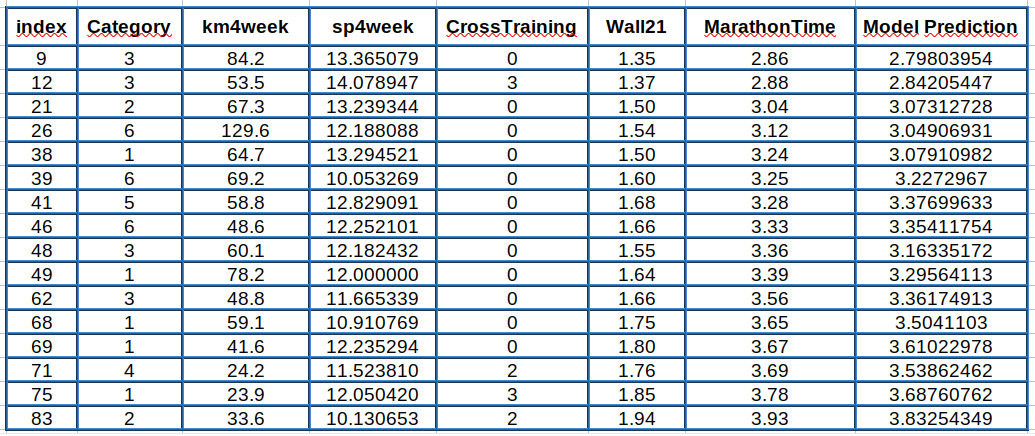

Prediction data is compared to the prediction variable label of the validation subset.

In [40]:
error = np.sqrt(mean_squared_error(test_label, predictions))
print('Porcentual error: %f' % (error * 100))

Porcentual error: 11.193777


A new register is created and the result is analyzed.

In [44]:
new_runner = pd.DataFrame(
    np.array([[1, 400, 20, 0, 1.4]]), 
    columns = ['Category', 'km4week', 'sp4week', 'CrossTraining', 'Wall21']
)

In [45]:
new_runner

,Category,km4week,sp4week,CrossTraining,Wall21
0,1.0,400.0,20.0,0.0,1.4


Make the prediction with the new runner.

In [46]:
model.predict(new_runner)

array([2.47924016])

For the new corridor with the proposed predictive characteristics, the model predicted that the corridor time would be 2.47924016.